In [3]:
#imported everything from the course, just in case I would need them

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from apyori import apriori
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Files for each season and dropping the data not needed for correlations

train = pd.read_csv("seasons-1314-1718.csv")

predict = pd.read_csv("season-1819_csv.csv") 

train_temp = train.drop(["B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","PSH","PSD","PSA","WHH","WHD","WHA","SJH","SJD","SJA","VCH","VCD","VCA","Bb1X2","BbMxH","BbAvH","BbMxD","BbAvD","BbMxA","BbAvA","BbOU","BbMx>2.5","BbAv>2.5","BbMx<2.5","BbAv<2.5","BbAH","BbAHh","BbMxAHH","BbAvAHH","BbMxAHA","BbAvAHA","PSCH","PSCD","PSCA"],axis=1)

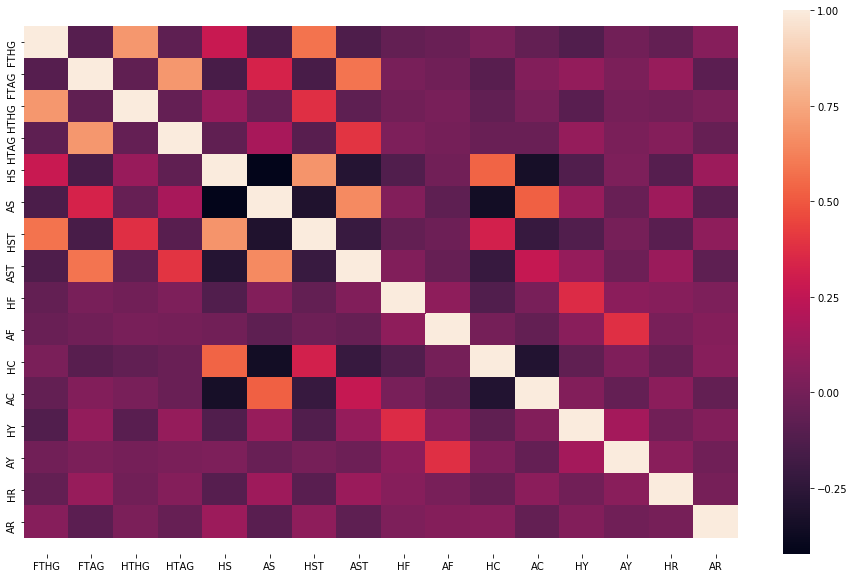

In [5]:
#Made a heatmap showing the correlations between the stats in a football game - sadly it doesn't show anything that interesting
#Only surprising thing was that Shots and Shots on target are positvely correlated with the teams cards

plt.figure(figsize=(16,10))
ax = sns.heatmap(train_temp.corr())
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()



In [6]:
#Here are we trying to show the correlations of fouls and cards for each referee in the dataset

d = {'Referee' : train_temp['Referee'],
    #'Home Team': train_temp['HomeTeam'],
    #'Away Team': train_temp['AwayTeam'],
     'Home Fouls': train_temp['HF'],
     'Away Fouls': train_temp['AF'],
    'Home yellow cards': train_temp['HY'],
    'Away yellow cards': train_temp ['AY'],
    'Home red cards': train_temp['HR'],
    'Away red cards': train_temp['AR']}

df = pd.DataFrame(d)
c = df['Referee'].astype('category')
a = dict(enumerate(c.cat.categories))
df['Referee'] = df['Referee'].astype('category').cat.codes
#df['Home Team'] =df['Home Team'].astype('category').cat.codes
#df['Away Team'] =df['Away Team'].astype('category').cat.codes

list = []

for ref in df['Referee']:
    if (ref not in list):
        list.append(ref) 


for i in list:
    ref = df[df['Referee'] == i]
    if (ref.shape[0] < 10):
        continue
    print("Referee " + a.get(i))
    test = ref.corr()
    print(test)
    print()
    print()

Referee A Taylor
                   Referee  Home Fouls  Away Fouls  Home yellow cards  \
Referee                NaN         NaN         NaN                NaN   
Home Fouls             NaN    1.000000    0.181943           0.318898   
Away Fouls             NaN    0.181943    1.000000           0.166310   
Home yellow cards      NaN    0.318898    0.166310           1.000000   
Away yellow cards      NaN    0.040324    0.438347           0.100189   
Home red cards         NaN    0.137513    0.024409           0.075527   
Away red cards         NaN    0.192489    0.031602           0.059061   

                   Away yellow cards  Home red cards  Away red cards  
Referee                          NaN             NaN             NaN  
Home Fouls                  0.040324        0.137513        0.192489  
Away Fouls                  0.438347        0.024409        0.031602  
Home yellow cards           0.100189        0.075527        0.059061  
Away yellow cards           1.000000       

In [10]:
#Here are we trying to show the teams correlations while being the away side for the most important stats (shots, goals)
#It would effectively the team attacks and defends and also how much it dominates the game (if you have a high correlation
# of shots and goals, then your team probably do not shoot as often

d = {
    'Home Team': train_temp['HomeTeam'],
    'Away Team': train_temp['AwayTeam'],
     'Home Team Goals': train_temp['FTHG'],
     'Away Team Goals': train_temp['FTAG'],
    'Home shots': train_temp['HS'],
    'Away shots': train_temp['AS'],
    }

df = pd.DataFrame(d)
c = df['Home Team'].astype('category')
home = dict(enumerate(c.cat.categories))
f = df['Away Team'].astype('category')
away = dict(enumerate(f.cat.categories))
df['Home Team'] =df['Home Team'].astype('category').cat.codes
df['Away Team'] =df['Away Team'].astype('category').cat.codes


list = []

for team in df['Home Team']:
    if (team not in list):
        list.append(team)

for i in list:
    team_corr = df[(df['Away Team'] == i)]
    print("Away team: " + home.get(i))
    test = team_corr.corr()
    print(test)
    print()
    print()

Away team: Arsenal
                 Home Team  Away Team  Home Team Goals  Away Team Goals  \
Home Team         1.000000        NaN        -0.055999        -0.060071   
Away Team              NaN        NaN              NaN              NaN   
Home Team Goals  -0.055999        NaN         1.000000        -0.126806   
Away Team Goals  -0.060071        NaN        -0.126806         1.000000   
Home shots       -0.130848        NaN         0.414319        -0.055832   
Away shots        0.044363        NaN        -0.216781         0.390588   

                 Home shots  Away shots  
Home Team         -0.130848    0.044363  
Away Team               NaN         NaN  
Home Team Goals    0.414319   -0.216781  
Away Team Goals   -0.055832    0.390588  
Home shots         1.000000   -0.368408  
Away shots        -0.368408    1.000000  


Away team: Liverpool
                 Home Team  Away Team  Home Team Goals  Away Team Goals  \
Home Team         1.000000        NaN        -0.023626        -

In [12]:
#Here are the correlations between certain teams, which should show how two teams' goals correlate to each other and 
#we can make some assumptions for certain matchups that should be easily predictable and to those which are not

d = {
    'Team 1': train_temp['HomeTeam'],
    'Team 2': train_temp['AwayTeam'],
     'Team 1 Goals': train_temp['FTHG'],
     'Team 2 Goals': train_temp['FTAG'],
    }

df = pd.DataFrame(d)
c = df['Team 1'].astype('category')
home = dict(enumerate(c.cat.categories))
f = df['Team 2'].astype('category')
away = dict(enumerate(f.cat.categories))
df['Team 1'] =df['Team 1'].astype('category').cat.codes
df['Team 2'] =df['Team 2'].astype('category').cat.codes


list = []

for team in df['Team 1']:
    if (team not in list):
        list.append(team)

for i in list:
    for j in list:
        if (i == j):
            continue
        team_corr = df[((df['Team 1'] == i) & (df['Team 2'] == j)) | ((df['Team 1'] == j) & (df['Team 2'] == i))]
        if(team_corr.shape[0] < 3):
            continue
        print("Team1: " + home.get(i) + " team 2: " + away.get(j))
        test = team_corr.corr()
        print(test)
        print()
        print()
        

Team1: Arsenal team 2: Liverpool
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.520483     -0.066372
Team 2       -1.000000  1.000000     -0.520483      0.066372
Team 1 Goals  0.520483 -0.520483      1.000000      0.111314
Team 2 Goals -0.066372  0.066372      0.111314      1.000000


Team1: Arsenal team 2: Norwich
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.666667      0.707107
Team 2       -1.000000  1.000000      0.666667     -0.707107
Team 1 Goals -0.666667  0.666667      1.000000     -0.235702
Team 2 Goals  0.707107 -0.707107     -0.235702      1.000000


Team1: Arsenal team 2: Sunderland
               Team 1   Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.00000 -1.00000     -0.621150      0.621150
Team 2       -1.00000  1.00000      0.621150     -0.621150
Team 1 Goals -0.62115  0.62115      1.000000     -0.070866
Team 2 Goals  0.62115 -0.62115     -0.070866      1.

Team1: Liverpool team 2: Newcastle
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.516398      0.287348
Team 2       -1.000000  1.000000      0.516398     -0.287348
Team 1 Goals -0.516398  0.516398      1.000000     -0.123655
Team 2 Goals  0.287348 -0.287348     -0.123655      1.000000


Team1: Liverpool team 2: Southampton
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.331862      0.688247
Team 2       -1.000000  1.000000      0.331862     -0.688247
Team 1 Goals -0.331862  0.331862      1.000000     -0.258857
Team 2 Goals  0.688247 -0.688247     -0.258857      1.000000


Team1: Liverpool team 2: Stoke
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.000000      0.668153
Team 2       -1.000000  1.000000      0.000000     -0.668153
Team 1 Goals  0.000000  0.000000      1.000000      0.100223
Team 2 Goals  0.668153 -0.668153      0

Team1: Sunderland team 2: Chelsea
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.457496      0.223607
Team 2       -1.000000  1.000000      0.457496     -0.223607
Team 1 Goals -0.457496  0.457496      1.000000      0.272798
Team 2 Goals  0.223607 -0.223607      0.272798      1.000000


Team1: Sunderland team 2: Crystal Palace
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.118678      0.000000
Team 2       -1.000000  1.000000     -0.118678      0.000000
Team 1 Goals  0.118678 -0.118678      1.000000     -0.021315
Team 2 Goals  0.000000  0.000000     -0.021315      1.000000


Team1: Sunderland team 2: Man City
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.854242      0.112509
Team 2       -1.000000  1.000000      0.854242     -0.112509
Team 1 Goals -0.854242  0.854242      1.000000     -0.096110
Team 2 Goals  0.112509 -0.112509

Team1: West Brom team 2: Norwich
               Team 1   Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.00000 -1.00000           NaN       0.57735
Team 2       -1.00000  1.00000           NaN      -0.57735
Team 1 Goals      NaN      NaN           NaN           NaN
Team 2 Goals  0.57735 -0.57735           NaN       1.00000


Team1: West Brom team 2: Sunderland
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.629941      0.179605
Team 2       -1.000000  1.000000     -0.629941     -0.179605
Team 1 Goals  0.629941 -0.629941      1.000000      0.158397
Team 2 Goals  0.179605 -0.179605      0.158397      1.000000


Team1: West Brom team 2: Swansea
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.108465      0.267261
Team 2       -1.000000  1.000000      0.108465     -0.267261
Team 1 Goals -0.108465  0.108465      1.000000     -0.434828
Team 2 Goals  0.267261 -0.267261     -0.434828    

Team1: West Ham team 2: Man United
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.301511      0.471405
Team 2       -1.000000  1.000000      0.301511     -0.471405
Team 1 Goals -0.301511  0.301511      1.000000     -0.085280
Team 2 Goals  0.471405 -0.471405     -0.085280      1.000000


Team1: West Ham team 2: Leicester
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.301511      0.218218
Team 2       -1.000000  1.000000     -0.301511     -0.218218
Team 1 Goals  0.301511 -0.301511      1.000000      0.065795
Team 2 Goals  0.218218 -0.218218      0.065795      1.000000


Team1: West Ham team 2: Burnley
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.112509     -0.102598
Team 2       -1.000000  1.000000     -0.112509      0.102598
Team 1 Goals  0.112509 -0.112509      1.000000     -0.103888
Team 2 Goals -0.102598  0.102598     -0.1

Team1: Crystal Palace team 2: Chelsea
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.557086      0.100504
Team 2       -1.000000  1.000000      0.557086     -0.100504
Team 1 Goals -0.557086  0.557086      1.000000     -0.279946
Team 2 Goals  0.100504 -0.100504     -0.279946      1.000000


Team1: Crystal Palace team 2: Man City
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.749269     -0.433013
Team 2       -1.000000  1.000000     -0.749269      0.433013
Team 1 Goals  0.749269 -0.749269      1.000000     -0.446109
Team 2 Goals -0.433013  0.433013     -0.446109      1.000000


Team1: Crystal Palace team 2: Aston Villa
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000  4.472136e-01  3.333333e-01
Team 2       -1.000000  1.000000 -4.472136e-01 -3.333333e-01
Team 1 Goals  0.447214 -0.447214  1.000000e+00  4.965068e-17
Team 2 Goals  0.333333 

Team1: Man City team 2: Watford
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.894427      0.778290
Team 2       -1.000000  1.000000      0.894427     -0.778290
Team 1 Goals -0.894427  0.894427      1.000000     -0.829993
Team 2 Goals  0.778290 -0.778290     -0.829993      1.000000


Team1: Man City team 2: Brighton
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.894427     -0.845154
Team 2       -1.000000  1.000000     -0.894427      0.845154
Team 1 Goals  0.894427 -0.894427      1.000000     -0.529150
Team 2 Goals -0.845154  0.845154     -0.529150      1.000000


Team1: Man City team 2: Huddersfield
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.502519     -0.894427
Team 2       -1.000000  1.000000     -0.502519      0.894427
Team 1 Goals  0.502519 -0.502519      1.000000     -0.224733
Team 2 Goals -0.894427  0.894427     -0.

Team1: Everton team 2: Cardiff
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.904534     -0.408248
Team 2       -1.000000  1.000000     -0.904534      0.408248
Team 1 Goals  0.904534 -0.904534      1.000000     -0.246183
Team 2 Goals -0.408248  0.408248     -0.246183      1.000000


Team1: Everton team 2: Tottenham
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.534522     -0.352208
Team 2       -1.000000  1.000000     -0.534522      0.352208
Team 1 Goals  0.534522 -0.534522      1.000000      0.134474
Team 2 Goals -0.352208  0.352208      0.134474      1.000000


Team1: Everton team 2: Man United
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.000000     -0.185695
Team 2       -1.000000  1.000000      0.000000      0.185695
Team 1 Goals  0.000000  0.000000      1.000000     -0.720604
Team 2 Goals -0.185695  0.185695     -0.7206

Team1: Hull team 2: Tottenham
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.654654     -0.668153
Team 2       -1.000000  1.000000     -0.654654      0.668153
Team 1 Goals  0.654654 -0.654654      1.000000     -0.437409
Team 2 Goals -0.668153  0.668153     -0.437409      1.000000


Team1: Hull team 2: Man United
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.485071     -0.468521
Team 2       -1.000000  1.000000     -0.485071      0.468521
Team 1 Goals  0.485071 -0.485071      1.000000      0.265144
Team 2 Goals -0.468521  0.468521      0.265144      1.000000


Team1: Hull team 2: Leicester
               Team 1   Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.00000 -1.00000      0.192450     -0.577350
Team 2       -1.00000  1.00000     -0.192450      0.577350
Team 1 Goals  0.19245 -0.19245      1.000000      0.555556
Team 2 Goals -0.57735  0.57735      0.555556      1.000000


Team 2 Goals  0.696311 -0.696311     -0.381385      1.000000


Team1: Southampton team 2: Aston Villa
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.522233       0.00000
Team 2       -1.000000  1.000000     -0.522233       0.00000
Team 1 Goals  0.522233 -0.522233      1.000000       0.12666
Team 2 Goals  0.000000  0.000000      0.126660       1.00000


Team1: Southampton team 2: Everton
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.156174      0.100504
Team 2       -1.000000  1.000000     -0.156174     -0.100504
Team 1 Goals  0.156174 -0.156174      1.000000     -0.423793
Team 2 Goals  0.100504 -0.100504     -0.423793      1.000000


Team1: Southampton team 2: Fulham
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.229416     -0.962250
Team 2       -1.000000  1.000000     -0.229416      0.962250
Team 1 Goals  0.229416 -0.229416

Team1: Cardiff team 2: West Ham
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.688247     -0.301511
Team 2       -1.000000  1.000000     -0.688247      0.301511
Team 1 Goals  0.688247 -0.688247      1.000000     -0.622543
Team 2 Goals -0.301511  0.301511     -0.622543      1.000000


Team1: Cardiff team 2: Chelsea
              Team 1  Team 2  Team 1 Goals  Team 2 Goals
Team 1           1.0    -1.0           1.0          -1.0
Team 2          -1.0     1.0          -1.0           1.0
Team 1 Goals     1.0    -1.0           1.0          -1.0
Team 2 Goals    -1.0     1.0          -1.0           1.0


Team1: Cardiff team 2: Crystal Palace
              Team 1  Team 2  Team 1 Goals  Team 2 Goals
Team 1           1.0    -1.0           0.0          -1.0
Team 2          -1.0     1.0           0.0           1.0
Team 1 Goals     0.0     0.0           1.0           0.0
Team 2 Goals    -1.0     1.0           0.0           1.0


Team1: Cardiff tea

Team1: Man United team 2: Sunderland
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.447214      0.674200
Team 2       -1.000000  1.000000      0.447214     -0.674200
Team 1 Goals -0.447214  0.447214      1.000000     -0.663325
Team 2 Goals  0.674200 -0.674200     -0.663325      1.000000


Team1: Man United team 2: Swansea
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.301511      0.634811
Team 2       -1.000000  1.000000      0.301511     -0.634811
Team 1 Goals -0.301511  0.301511      1.000000     -0.829412
Team 2 Goals  0.634811 -0.634811     -0.829412      1.000000


Team1: Man United team 2: West Brom
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.128037      0.497519
Team 2       -1.000000  1.000000     -0.128037     -0.497519
Team 1 Goals  0.128037 -0.128037      1.000000     -0.140142
Team 2 Goals  0.497519 -0.497519   

              Team 1  Team 2  Team 1 Goals  Team 2 Goals
Team 1         1.000  -1.000      0.500000     -0.125000
Team 2        -1.000   1.000     -0.500000      0.125000
Team 1 Goals   0.500  -0.500      1.000000      0.289062
Team 2 Goals  -0.125   0.125      0.289062      1.000000


Team1: Leicester team 2: Man United
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.258199     -0.654654
Team 2       -1.000000  1.000000     -0.258199      0.654654
Team 1 Goals  0.258199 -0.258199      1.000000      0.140859
Team 2 Goals -0.654654  0.654654      0.140859      1.000000


Team1: Leicester team 2: Burnley
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.258199     -0.301511
Team 2       -1.000000  1.000000     -0.258199      0.301511
Team 1 Goals  0.258199 -0.258199      1.000000      0.077850
Team 2 Goals -0.301511  0.301511      0.077850      1.000000


Team1: Leicester team 2: Bourn

Team 2 Goals -0.57735  0.57735       0.57735       1.00000


Team1: Burnley team 2: Huddersfield
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.000000      0.301511
Team 2       -1.000000  1.000000      0.000000     -0.301511
Team 1 Goals  0.000000  0.000000      1.000000      0.904534
Team 2 Goals  0.301511 -0.301511      0.904534      1.000000


Team1: Bournemouth team 2: Arsenal
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.621150      0.774597
Team 2       -1.000000  1.000000      0.621150     -0.774597
Team 1 Goals -0.621150  0.621150      1.000000     -0.252026
Team 2 Goals  0.774597 -0.774597     -0.252026      1.000000


Team1: Bournemouth team 2: Liverpool
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.359211     -0.851206
Team 2       -1.000000  1.000000     -0.359211      0.851206
Team 1 Goals  0.359211 -0.359211  

Team1: Watford team 2: Southampton
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000      0.258199      0.307794
Team 2       -1.000000  1.000000     -0.258199     -0.307794
Team 1 Goals  0.258199 -0.258199      1.000000      0.556304
Team 2 Goals  0.307794 -0.307794      0.556304      1.000000


Team1: Watford team 2: Stoke
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.218218      0.408248
Team 2       -1.000000  1.000000      0.218218     -0.408248
Team 1 Goals -0.218218  0.218218      1.000000     -0.267261
Team 2 Goals  0.408248 -0.408248     -0.267261      1.000000


Team1: Watford team 2: Tottenham
                Team 1    Team 2  Team 1 Goals  Team 2 Goals
Team 1        1.000000 -1.000000     -0.516398      0.689730
Team 2       -1.000000  1.000000      0.516398     -0.689730
Team 1 Goals -0.516398  0.516398      1.000000     -0.483381
Team 2 Goals  0.689730 -0.689730     -0.48338

In [294]:
#For testing and being certain that the stats are from right teams

print(list)

df[(df['Home Team'] == 22) & (df['Away Team'] == 23)]

[0, 13, 18, 22, 23, 26, 27, 6, 7, 14, 1, 8, 9, 11, 17, 20, 21, 5, 24, 15, 12, 19, 4, 2, 25, 16, 3, 10, 28]


,Home Team,Away Team,Home Team Goals,Away Team Goals,Home shots,Away shots,Home team shots on target,Away team shots on target
377,22,23,1,3,20,8,4,4
437,22,23,0,0,15,7,3,1
784,22,23,1,1,10,20,2,9
1501,22,23,0,2,13,3,4,3
